In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers


Using TensorFlow backend.


In [ ]:

os.environ["KERAS_BACKEND"] = "tensorflow"

# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)

# The dimension of our random noise vector.
random_dim = 10

In [ ]:
def load_minst_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # normalize our inputs to be in the range[-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [ ]:

def adam_optimizer():
    return Adam(lr=0.0005, beta_1=0.5)

def generator(optimizer):
    generator = Sequential()
    generator.add(Dense(784, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

def discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(784, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))


    discriminator.add(Dense(784))
    discriminator.add(LeakyReLU(0.2))


    discriminator.add(Dense(784))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(2))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [ ]:
def gan(discriminator, random_dim, generator, optimizer):
    discriminator.trainable = False
    gan_input = Input(shape=(random_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [ ]:

def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.24it/s]

--------------- Epoch 2 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.32it/s]

--------------- Epoch 3 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.99it/s]

--------------- Epoch 4 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.83it/s]

--------------- Epoch 5 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.72it/s]

--------------- Epoch 6 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.86it/s]

--------------- Epoch 7 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.61it/s]

--------------- Epoch 8 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.59it/s]

--------------- Epoch 9 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.44it/s]

--------------- Epoch 10 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.88it/s]

--------------- Epoch 11 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.32it/s]

--------------- Epoch 12 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.52it/s]

--------------- Epoch 13 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.95it/s]

--------------- Epoch 14 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.24it/s]

--------------- Epoch 15 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.95it/s]

--------------- Epoch 16 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.51it/s]

--------------- Epoch 17 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.94it/s]

--------------- Epoch 18 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.22it/s]

--------------- Epoch 19 ---------------


  2%|▏         | 9/468 [00:00<00:05, 87.07it/s]

--------------- Epoch 20 ---------------


  2%|▏         | 9/468 [00:00<00:05, 80.34it/s]

--------------- Epoch 21 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.38it/s]

--------------- Epoch 22 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.48it/s]

--------------- Epoch 23 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.25it/s]

--------------- Epoch 24 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.49it/s]

--------------- Epoch 25 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.95it/s]

--------------- Epoch 26 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.79it/s]

--------------- Epoch 27 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.18it/s]

--------------- Epoch 28 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.03it/s]

--------------- Epoch 29 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.31it/s]

--------------- Epoch 30 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.99it/s]

--------------- Epoch 31 ---------------


  2%|▏         | 9/468 [00:00<00:05, 86.59it/s]

--------------- Epoch 32 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.09it/s]

--------------- Epoch 33 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.78it/s]

--------------- Epoch 34 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.98it/s]

--------------- Epoch 35 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.19it/s]

--------------- Epoch 36 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.67it/s]

--------------- Epoch 37 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.31it/s]

--------------- Epoch 38 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.37it/s]

--------------- Epoch 39 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.45it/s]

--------------- Epoch 40 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.15it/s]

--------------- Epoch 41 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.48it/s]

--------------- Epoch 42 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.17it/s]

--------------- Epoch 43 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.13it/s]

--------------- Epoch 44 ---------------


  2%|▏         | 9/468 [00:00<00:05, 86.83it/s]

--------------- Epoch 45 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.47it/s]

--------------- Epoch 46 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.53it/s]

--------------- Epoch 47 ---------------


  2%|▏         | 10/468 [00:00<00:05, 89.70it/s]

--------------- Epoch 48 ---------------


  2%|▏         | 9/468 [00:00<00:05, 79.65it/s]

--------------- Epoch 49 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.35it/s]

--------------- Epoch 50 ---------------


100%|██████████| 468/468 [00:05<00:00, 81.23it/s]


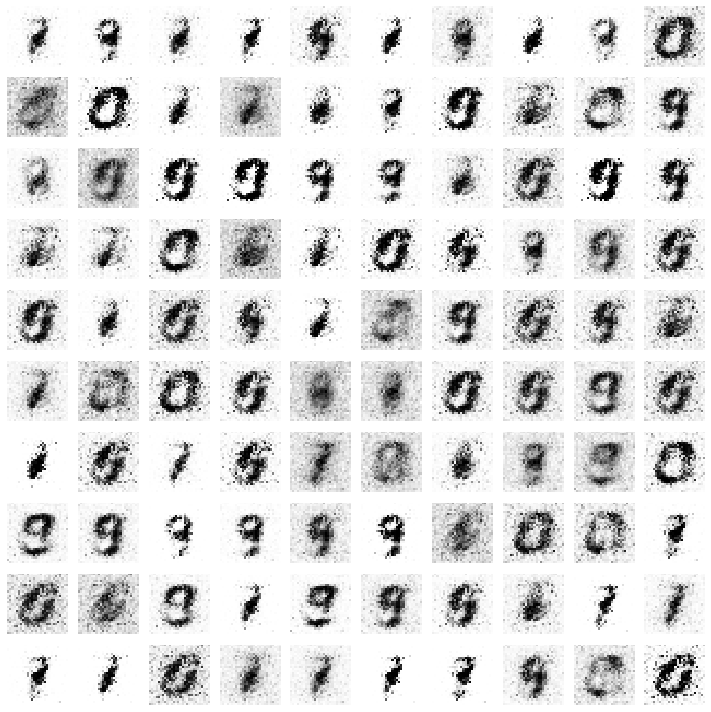

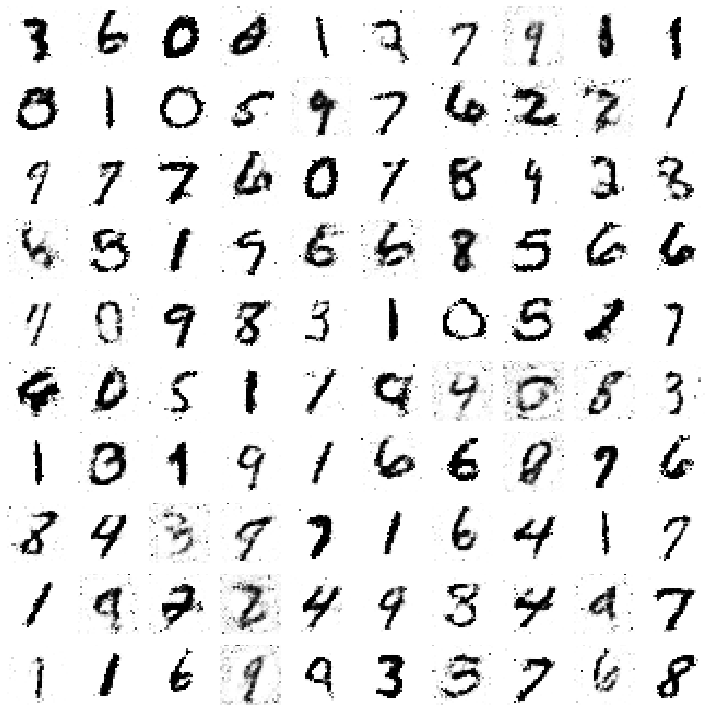

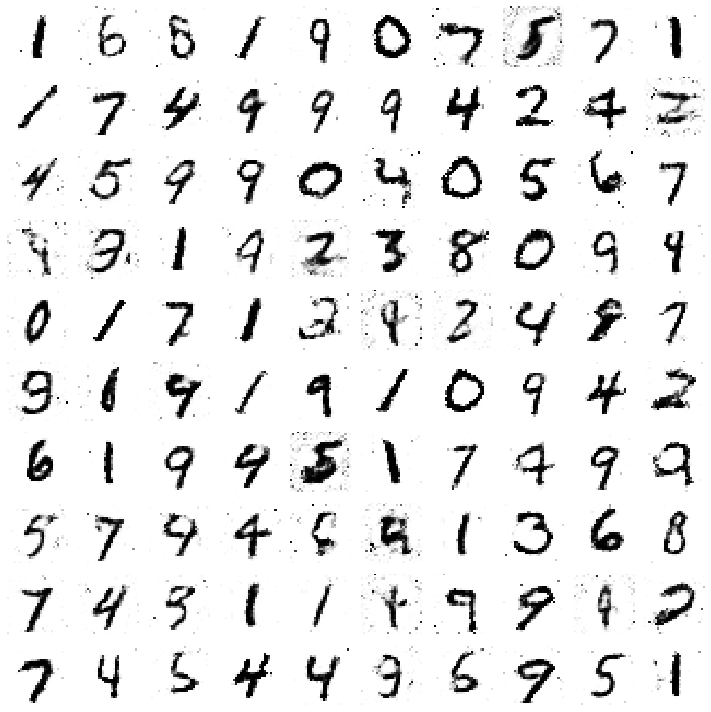

In [ ]:
def train(epochs=1, batch_size=128):
    x_train, y_train, x_test, y_test = load_minst_data()
    batch_count = int(x_train.shape[0] / batch_size)

    adam = adam_optimizer()
    generator = generator(adam)
    discriminator = discriminator(adam)
    gan = gan(discriminator, random_dim, generator, adam)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batch_count)):
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])
            y_dis = np.zeros(2*batch_size)           
            y_dis[:batch_size] = 0.9
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

if __name__ == '__main__':
    train(50, 128)